<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/MSDS422-Airlines-Project/blob/main/Final_Project_Part_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
Taking the perspective of the CEO of United in August 2015, the goal is to analyze the Skytrax Reviews Dataset to find focus areas for the customer experience.

Link to Part 1 (EDA): https://colab.research.google.com/drive/1e3BaBqnoDy3yb_xvaFqOZJYuhz_YEDMv?usp=sharing

Link to Part 2 (NA Carrier Analysis): https://colab.research.google.com/drive/1_itJ0k2WhjNTh1aKawhtxJn3zaLWCyQV?usp=sharing

Link to Part 3 (Opportunity Analysis): https://colab.research.google.com/drive/1A0AuW30CiUdbjBJzSzLt_p-6sO55sIc_?usp=sharing

### Import modules and data

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# To ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('airline.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41396 entries, 0 to 41395
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   41396 non-null  object 
 1   link                           41396 non-null  object 
 2   title                          41396 non-null  object 
 3   author                         41396 non-null  object 
 4   author_country                 39805 non-null  object 
 5   date                           41396 non-null  object 
 6   content                        41396 non-null  object 
 7   aircraft                       1278 non-null   object 
 8   type_traveller                 2378 non-null   object 
 9   cabin_flown                    38520 non-null  object 
 10  route                          2341 non-null   object 
 11  overall_rating                 36861 non-null  float64
 12  seat_comfort_rating            33706 non-null 

In [ ]:
# List of columns to convert
cols_to_convert = [
    'overall_rating',
    'seat_comfort_rating',
    'cabin_staff_rating',
    'food_beverages_rating',
    'inflight_entertainment_rating',
    'ground_service_rating',
    'wifi_connectivity_rating',
    'value_money_rating'
]

# Convert to nullable integer type (Int64 allows missing values)
df[cols_to_convert] = df[cols_to_convert].astype('Int64')

In [ ]:
# See first few rows
df.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7,4,4,4,0,<NA>,<NA>,4,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10,4,5,4,1,<NA>,<NA>,5,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9,5,5,4,0,<NA>,<NA>,5,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8,4,4,3,1,<NA>,<NA>,4,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4,4,2,1,2,<NA>,<NA>,2,0


### Adding features to filter data down (year, 100pluscount, airline_type)

In [ ]:
# Split out year from date column
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [ ]:
# Count by year
df['year'].value_counts()

,count
year,
2014,13944
2013,8672
2015,7458
2012,4721
2011,3215
2010,1529
2009,594
2008,431
2007,309


#### Creating feature airline_type

In [ ]:
# Count unique values of airline_name
df['airline_name'].nunique()

362

In [ ]:
# Count different airline_name for those airlines with >100 count
df['airline_name'].value_counts()[df['airline_name'].value_counts() > 100]

# Print the list
df['airline_name'].value_counts()[df['airline_name'].value_counts() > 100].index.tolist()

['spirit-airlines',
 'british-airways',
 'united-airlines',
 'jet-airways',
 'air-canada-rouge',
 'emirates',
 'ryanair',
 'american-airlines',
 'lufthansa',
 'qantas-airways',
 'etihad-airways',
 'turkish-airlines',
 'cathay-pacific-airways',
 'qatar-airways',
 'air-canada',
 'malaysia-airlines',
 'allegiant-air',
 'delta-air-lines',
 'virgin-atlantic-airways',
 'thomson-airways',
 'norwegian',
 'easyjet',
 'singapore-airlines',
 'us-airways',
 'frontier-airlines',
 'aer-lingus',
 'china-southern-airlines',
 'thomas-cook-airlines',
 'air-france',
 'jetstar-airways',
 'sunwing-airlines',
 'tap-portugal',
 'monarch-airlines',
 'finnair',
 'southwest-airlines',
 'flybe',
 'klm-royal-dutch-airlines',
 'virgin-australia',
 'iberia',
 'thai-airways',
 'jet2-com',
 'garuda-indonesia',
 'swiss-international-air-lines',
 'air-transat',
 'air-india',
 'alitalia',
 'korean-air',
 'air-new-zealand',
 'airasia',
 'srilankan-airlines',
 'vueling-airlines',
 'asiana-airlines',
 'eva-air',
 'air-berl

In [ ]:
# For airlines with most ratings (count > 100) add a feature called 100pluscount and mark 1
df['100pluscount'] = np.where(df['airline_name'].isin(df['airline_name'].value_counts()[df['airline_name'].value_counts() > 100].index.tolist()), 1, 0)

In [ ]:
# Define airline groups
ulcc = {
    'spirit-airlines', 'ryanair', 'easyjet', 'wizz-air', 'frontier-airlines',
    'allegiant-air', 'scoot', 'airasia', 'jetstar-airways'
}

na_legacy = {
    'american-airlines', 'united-airlines', 'delta-air-lines',
    'air-canada', 'alaska-airlines', 'jetblue-airways', 'southwest-airlines'
}

premium_international = {
    'singapore-airlines', 'qatar-airways', 'emirates',
    'cathay-pacific-airways', 'etihad-airways', 'turkish-airlines',
    'lufthansa', 'ana-all-nippon-airways', 'eva-air', 'korean-air'
}

european_full_service = {
    'british-airways', 'air-france', 'klm-royal-dutch-airlines',
    'austrian-airlines', 'swiss-international-air-lines', 'finnair',
    'iberia', 'tap-portugal', 'sas-scandinavian-airlines'
}

asian_full_service = {
    'thai-airways', 'asiana-airlines', 'china-eastern-airlines',
    'china-southern-airlines', 'air-india', 'philippine-airlines',
    'malaysia-airlines', 'vietnam-airlines', 'japan-airlines',
    'garuda-indonesia'
}

def assign_carrier_type(airline):
    if airline in ulcc:
        return 'ulcc'
    elif airline in na_legacy:
        return 'na_legacy'
    elif airline in premium_international:
        return 'premium_international'
    elif airline in european_full_service:
        return 'european_full_service'
    elif airline in asian_full_service:
        return 'asian_full_service'
    else:
        return 'other'

df['airline_type'] = df['airline_name'].apply(assign_carrier_type)

#### Creating feature author_region and author_subregion

In [ ]:
# Print the list of all unique author_country
df['author_country'].unique().tolist()

['Germany',
 'United States',
 'Switzerland',
 'Singapore',
 'Poland',
 'France',
 'Slovenia',
 'Turkey',
 'Malaysia',
 'Canada',
 'Greece',
 'United Kingdom',
 'Australia',
 'Spain',
 'Ukraine',
 'Macedonia',
 nan,
 'Belgium',
 'Italy',
 'Sweden',
 'Egypt',
 'Israel',
 'Ireland',
 'Cyprus',
 'Denmark',
 'China',
 'Slovakia',
 'New Zealand',
 'Czech Republic',
 'India',
 'Netherlands',
 'Russian Federation',
 'Hungary',
 'Argentina',
 'Romania',
 'Bermuda',
 'Thailand',
 'Chile',
 'Brazil',
 'Mexico',
 'Iran',
 'Colombia',
 'Philippines',
 'Hong Kong',
 'Latvia',
 'Lithuania',
 'Austria',
 'Japan',
 'Peru',
 'Vietnam',
 'United Arab Emirates',
 'Norway',
 'Morocco',
 'Saudi Arabia',
 'Costa Rica',
 'South Africa',
 'Trinidad & Tobago',
 'Serbia',
 'Bahamas',
 'Estonia',
 'Kazakhstan',
 'Uzbekistan',
 'New Caledonia',
 'Wallis & Futuna Islands',
 'Mauritius',
 'Bulgaria',
 'Croatia',
 'Portugal',
 'Finland',
 'Indonesia',
 'Botswana',
 'Taiwan',
 'Kenya',
 'Namibia',
 'Qatar',
 'South K

In [ ]:
country_to_subregion = {
    # North America
    'United States': 'Northern America',
    'Canada': 'Northern America',
    'Mexico': 'Central America',
    'Bermuda': 'Northern America',
    'Puerto Rico': 'Caribbean',
    'Bahamas': 'Caribbean',
    'Cuba': 'Caribbean',
    'Barbados': 'Caribbean',
    'Jamaica': 'Caribbean',
    'Honduras': 'Central America',
    'Guatemala': 'Central America',
    'El Salvador': 'Central America',
    'Panama': 'Central America',
    'Costa Rica': 'Central America',
    'Dominican Republic': 'Caribbean',
    'Grenada': 'Caribbean',
    'Trinidad & Tobago': 'Caribbean',
    'Nicaragua': 'Central America',
    'Aruba': 'Caribbean',
    'Cayman Islands': 'Caribbean',
    'British Virgin Islands': 'Caribbean',

    # South America
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Peru': 'South America',
    'Venezuela': 'South America',
    'Bolivia': 'South America',
    'Paraguay': 'South America',
    'Uruguay': 'South America',
    'Ecuador': 'South America',

    # Europe
    'Germany': 'Western Europe',
    'France': 'Western Europe',
    'Switzerland': 'Western Europe',
    'United Kingdom': 'Northern Europe',
    'Italy': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Netherlands': 'Western Europe',
    'Belgium': 'Western Europe',
    'Austria': 'Western Europe',
    'Ireland': 'Northern Europe',
    'Portugal': 'Southern Europe',
    'Sweden': 'Northern Europe',
    'Norway': 'Northern Europe',
    'Denmark': 'Northern Europe',
    'Poland': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Czech Republic': 'Eastern Europe',
    'Slovakia': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Latvia': 'Eastern Europe',
    'Lithuania': 'Eastern Europe',
    'Russia': 'Eastern Europe',
    'Russian Federation': 'Eastern Europe',
    'Estonia': 'Eastern Europe',
    'Romania': 'Eastern Europe',
    'Belarus': 'Eastern Europe',
    'Bulgaria': 'Eastern Europe',
    'Croatia': 'Southern Europe',
    'Slovenia': 'Southern Europe',
    'Macedonia': 'Southern Europe',
    'Serbia': 'Southern Europe',
    'Montenegro': 'Southern Europe',
    'Moldova': 'Eastern Europe',
    'Albania': 'Southern Europe',
    'Malta': 'Southern Europe',
    'Greece': 'Southern Europe',
    'Cyprus': 'Southern Europe',
    'Turkey': 'Southern Europe',
    'Iceland': 'Northern Europe',
    'Finland': 'Northern Europe',
    'Luxembourg': 'Western Europe',
    'Monaco': 'Western Europe',
    'Andorra': 'Southern Europe',
    'Liechtenstein': 'Western Europe',
    'Gibraltar': 'Southern Europe',

    # Asia
    'India': 'South Asia',
    'Pakistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Sri Lanka': 'South Asia',
    'Nepal': 'South Asia',
    'Bhutan': 'South Asia',
    'Afghanistan': 'South Asia',
    'Maldives': 'South Asia',

    'China': 'East Asia',
    'Japan': 'East Asia',
    'South Korea': 'East Asia',
    'North Korea': 'East Asia',
    'Mongolia': 'East Asia',
    'Taiwan': 'East Asia',
    'Hong Kong': 'East Asia',
    'Macau': 'East Asia',

    'Thailand': 'Southeast Asia',
    'Vietnam': 'Southeast Asia',
    'Indonesia': 'Southeast Asia',
    'Philippines': 'Southeast Asia',
    'Malaysia': 'Southeast Asia',
    'Singapore': 'Southeast Asia',
    'Myanmar': 'Southeast Asia',
    'Cambodia': 'Southeast Asia',
    'Brunei': 'Southeast Asia',
    'Timor-Leste': 'Southeast Asia',
    'East Timor': 'Southeast Asia',
    'Laos': 'Southeast Asia',

    'Georgia': 'Central Asia',
    'Kazakhstan': 'Central Asia',
    'Uzbekistan': 'Central Asia',
    'Armenia': 'Central Asia',
    'Azerbaijan': 'Central Asia',

    # Middle East
    'Israel': 'Middle East',
    'United Arab Emirates': 'Middle East',
    'Saudi Arabia': 'Middle East',
    'Iran': 'Middle East',
    'Iraq': 'Middle East',
    'Jordan': 'Middle East',
    'Lebanon': 'Middle East',
    'Palestinian Territories': 'Middle East',
    'Bahrain': 'Middle East',
    'Kuwait': 'Middle East',
    'Oman': 'Middle East',
    'Qatar': 'Middle East',

    # Africa
    'South Africa': 'Southern Africa',
    'Namibia': 'Southern Africa',
    'Botswana': 'Southern Africa',
    'Zimbabwe': 'Southern Africa',
    'Malawi': 'Southern Africa',
    'Zambia': 'Southern Africa',
    'Mozambique': 'Southern Africa',
    'Lesotho': 'Southern Africa',

    'Kenya': 'Eastern Africa',
    'Uganda': 'Eastern Africa',
    'Tanzania': 'Eastern Africa',
    'Rwanda': 'Eastern Africa',
    'Ethiopia': 'Eastern Africa',
    'Djibouti': 'Eastern Africa',

    'Egypt': 'Northern Africa',
    'Morocco': 'Northern Africa',
    'Mauritania': 'Northern Africa',
    'Algeria': 'Northern Africa',
    'Tunisia': 'Northern Africa',

    'Nigeria': 'Western Africa',
    'Ghana': 'Western Africa',
    'Senegal': 'Western Africa',
    'Gambia': 'Western Africa',
    'Benin': 'Western Africa',
    'Cameroon': 'Western Africa',
    'Mali': 'Western Africa',

    'Congo': 'Central Africa',
    'Democratic Republic of the Congo': 'Central Africa',
    'Angola': 'Central Africa',

    'Seychelles': 'Indian Ocean',
    'Mauritius': 'Indian Ocean',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'Fiji': 'Oceania',
    'Vanuatu': 'Oceania',
    'New Caledonia': 'Oceania',
    'Wallis & Futuna Islands': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Guam': 'Oceania',

    # Unknown
    np.nan: 'Unknown'
}

In [ ]:
subregion_to_region = {
    'Northern America': 'North America',
    'Central America': 'North America',
    'Caribbean': 'North America',
    'South America': 'South America',

    'Western Europe': 'Europe',
    'Eastern Europe': 'Europe',
    'Southern Europe': 'Europe',
    'Northern Europe': 'Europe',

    'South Asia': 'Asia',
    'Southeast Asia': 'Asia',
    'East Asia': 'Asia',
    'Central Asia': 'Asia',

    'Middle East': 'Asia',

    'Northern Africa': 'Africa',
    'Western Africa': 'Africa',
    'Central Africa': 'Africa',
    'Eastern Africa': 'Africa',
    'Southern Africa': 'Africa',
    'Indian Ocean': 'Africa',

    'Oceania': 'Oceania',

    'Unknown': 'Unknown'
}

In [ ]:
# Map subregion
df['author_subregion'] = df['author_country'].map(country_to_subregion)

# Map region from subregion
df['author_region'] = df['author_subregion'].map(subregion_to_region)

In [ ]:
# Count author_region
df['author_region'].value_counts()

,count
author_region,
Europe,16366
North America,11999
Oceania,5721
Asia,4757
Unknown,1591
Africa,524
South America,435


In [ ]:
# Breakdown of counts by region and subregion
region_subregion_counts = df.groupby(['author_region', 'author_subregion']).size().reset_index(name='counts')
print(region_subregion_counts)

    author_region  author_subregion  counts
0          Africa    Central Africa      10
1          Africa    Eastern Africa      92
2          Africa      Indian Ocean      17
3          Africa   Northern Africa      67
4          Africa   Southern Africa     317
5          Africa    Western Africa      21
6            Asia      Central Asia      68
7            Asia         East Asia    1000
8            Asia       Middle East     839
9            Asia        South Asia     677
10           Asia    Southeast Asia    2173
11         Europe    Eastern Europe     625
12         Europe   Northern Europe   11233
13         Europe   Southern Europe    1238
14         Europe    Western Europe    3270
15  North America         Caribbean      71
16  North America   Central America     110
17  North America  Northern America   11818
18        Oceania           Oceania    5721
19  South America     South America     435
20        Unknown           Unknown    1591


### EDA focused on top 100 carriers

In [ ]:
# Filter data to 100pluscount = 1 and year 2010 onwards
df_filtered = df[df['year'] >= 2010]
df_filtered = df_filtered[df_filtered['100pluscount'] == 1]

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35184 entries, 40 to 41395
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   airline_name                   35184 non-null  object
 1   link                           35184 non-null  object
 2   title                          35184 non-null  object
 3   author                         35184 non-null  object
 4   author_country                 35145 non-null  object
 5   date                           35184 non-null  object
 6   content                        35184 non-null  object
 7   aircraft                       1153 non-null   object
 8   type_traveller                 2164 non-null   object
 9   cabin_flown                    33930 non-null  object
 10  route                          2128 non-null   object
 11  overall_rating                 31950 non-null  Int64 
 12  seat_comfort_rating            31381 non-null  Int64 
 13  cabin

In [ ]:
# For rating_cols variables remove suffix "_rating"
df_filtered.rename(columns=lambda x: x.replace('_rating', ''), inplace=True)

# Create a list of all rating variables
rating_cols = [
    'overall',
    'seat_comfort',
    'cabin_staff',
    'food_beverages',
    'inflight_entertainment',
    'ground_service',
    'wifi_connectivity',
    'value_money'
]

In [ ]:
# Count unique airline_name by airline_type
df_filtered.groupby('airline_type')['airline_name'].nunique()

,airline_name
airline_type,
asian_full_service,10
european_full_service,9
na_legacy,7
other,66
premium_international,10
ulcc,9


In [ ]:
# Describe ratings based on airline_type
df_filtered.groupby('airline_type')['overall'].describe()

,count,mean,std,min,25%,50%,75%,max
airline_type,,,,,,,,
asian_full_service,3128.0,6.938939,2.788306,1.0,5.0,8.0,9.0,10.0
european_full_service,3449.0,6.149319,3.042054,1.0,3.0,7.0,9.0,10.0
na_legacy,3052.0,4.839777,3.490524,1.0,1.0,4.0,8.0,10.0
other,14293.0,6.03932,3.206355,1.0,3.0,7.0,9.0,10.0
premium_international,4576.0,6.804851,2.937555,1.0,5.0,8.0,9.0,10.0
ulcc,3452.0,5.140209,3.606802,1.0,1.0,5.0,9.0,10.0


What do we need to do to get on par with other airlines?

In [ ]:
# For each airline_type describe ratings of each airline, arrange each set in highest to lowest, exlude other
df_filtered.groupby(['airline_type', 'airline_name'])['overall'].describe().sort_values(by=['airline_type', 'mean'], ascending=False)

count      mean  \
airline_type          airline_name                                         
ulcc                  easyjet                            385.0  7.355844   
                      scoot                              165.0  6.654545   
                      ryanair                            528.0  6.539773   
                      airasia                            296.0  6.456081   
                      wizz-air                           225.0  5.777778   
                      jetstar-airways                    333.0  5.657658   
                      allegiant-air                      307.0   4.71987   
                      frontier-airlines                  247.0  4.101215   
                      spirit-airlines                    966.0  2.902692   
premium_international korean-air                         315.0  8.034921   
                      eva-air                            296.0  7.976351   
                      singapore-airlines                 432.0  7.773148   
                      ana-all-nippon-airways             257.0  7.521401   
                      qatar-airways                      492.0  7.319106   
                      lufthansa                          600.0  6.993333   
                      cathay-pacific-airways             494.0   6.88664   
                      emirates                           690.0  6.246377   
                      turkish-airlines                   485.0  6.026804   
                      etihad-airways                     515.0  4.900971   
other                 air-astana                          94.0   8.37234   
                      bangkok-airways                    213.0  8.122066   
                      indigo-airlines                    103.0  8.087379   
                      aegean-airlines                    225.0  7.826667   
                      airasia-x                          246.0  7.707317   
                      oman-air                           167.0  7.586826   
                      silkair                            113.0  7.548673   
                      royal-brunei-airlines              260.0  7.542308   
                      dragonair                          118.0  7.491525   
                      virgin-america                     207.0  7.362319   
                      aer-lingus                         383.0  7.289817   
                      qantas-airways                     580.0  7.005172   
                      norwegian                          375.0  6.962667   
                      royal-jordanian-airlines           143.0  6.958042   
                      jet2-com                           301.0  6.950166   
                      tigerair                           202.0  6.930693   
                      avianca                            134.0  6.910448   
                      aeroflot-russian-airlines          236.0  6.737288   
                      air-new-zealand                    281.0   6.72242   
                      copa-airlines                      100.0       6.7   
                      china-airlines                     215.0  6.665116   
                      porter-airlines                     88.0  6.636364   
                      cebu-pacific                        84.0  6.607143   
                      icelandair                         245.0  6.579592   
                      srilankan-airlines                 279.0  6.523297   
                      lan-airlines                       251.0  6.521912   
                      air-transat                        292.0  6.510274   
                      south-african-airways              252.0  6.448413   
                      bmi-british-midland-international  133.0  6.398496   
                      lot-polish-airlines                143.0  6.335664   
                      flybe                              233.0  6.270386   
                      pegasus-airlines                   106.0  6.235849   
                      aeromex

Are people from certain subregions more or less critical of airlines? Do they expect a higher quality of service, do they speak up more or is airline quality worse?

In [ ]:
# Describe rating by author_country, arrange descending order, only show countries with more than 50 entries
df_filtered[df_filtered['author_subregion'].isin(df_filtered['author_subregion'].value_counts()[df_filtered['author_subregion'].value_counts() > 50].index.tolist())].groupby('author_subregion')['overall'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
author_subregion,,,,,,,,
Central Asia,49.0,8.122449,2.758567,1.0,8.0,9.0,10.0,10.0
East Asia,774.0,6.988372,2.733269,1.0,5.0,8.0,9.0,10.0
Southeast Asia,1833.0,6.867976,2.715801,1.0,5.0,8.0,9.0,10.0
Eastern Europe,421.0,6.648456,2.974483,1.0,4.0,8.0,9.0,10.0
Central America,70.0,6.6,3.209587,1.0,4.25,8.0,9.0,10.0
Southern Europe,930.0,6.567742,2.934196,1.0,4.0,8.0,9.0,10.0
Southern Africa,229.0,6.510917,2.977417,1.0,4.0,7.0,9.0,10.0
Oceania,4929.0,6.47961,3.051114,1.0,4.0,8.0,9.0,10.0
Western Europe,2587.0,6.431001,2.916632,1.0,4.0,7.0,9.0,10.0


### EDA focused on na_legacy airlines

In [ ]:
# Filter to na_legacy only
df_filtered_na = df_filtered[df_filtered['airline_type'] == 'na_legacy']

In [ ]:
# Count rows
df_filtered_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3261 entries, 1528 to 39120
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline_name            3261 non-null   object
 1   link                    3261 non-null   object
 2   title                   3261 non-null   object
 3   author                  3261 non-null   object
 4   author_country          3255 non-null   object
 5   date                    3261 non-null   object
 6   content                 3261 non-null   object
 7   aircraft                143 non-null    object
 8   type_traveller          335 non-null    object
 9   cabin_flown             3058 non-null   object
 10  route                   329 non-null    object
 11  overall                 3052 non-null   Int64 
 12  seat_comfort            3098 non-null   Int64 
 13  cabin_staff             3099 non-null   Int64 
 14  food_beverages          3047 non-null   Int64 
 15  infli

In [ ]:
# Step 1: Compute number of reviews per airline
review_counts = df_filtered_na.groupby('airline_name').size().rename("num_reviews")

# Step 2: Compute average ratings per airline
avg_ratings = df_filtered_na.groupby('airline_name')[rating_cols].mean().round(2)

# Step 3: Join ratings and review counts
result = avg_ratings.join(review_counts)

# Step 4: Compute the NA legacy average row (since df_filtered_na already filtered)
na_legacy_avg = df_filtered_na[rating_cols].mean().round(2)
na_legacy_count = df_filtered_na.shape[0]

na_legacy_row = pd.DataFrame(
    [na_legacy_avg.tolist() + [na_legacy_count]],
    columns=rating_cols + ['num_reviews'],
    index=['Average: NA Legacy Airlines']
)

# Step 5: Append the average row and sort
final_result = pd.concat([result, na_legacy_row])
final_result = final_result.sort_values(by='overall', ascending=False)

# Show the final result
final_result

,overall,seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,wifi_connectivity,value_money,num_reviews
jetblue-airways,7.21,3.73,3.52,3.2,3.36,3.31,4.11,3.48,237
alaska-airlines,6.88,3.37,3.69,2.9,1.69,4.17,3.67,3.2,236
southwest-airlines,6.84,3.18,3.48,2.81,2.5,2.86,2.64,3.4,379
delta-air-lines,6.16,3.11,3.35,2.88,2.71,3.05,2.78,2.99,466
Average: NA Legacy Airlines,4.84,2.82,2.91,2.48,2.37,2.3,2.29,2.74,3261
air-canada,4.66,2.82,2.93,2.46,2.92,2.35,1.89,2.72,491
american-airlines,3.66,2.49,2.53,2.26,1.96,1.89,1.94,2.41,612
united-airlines,3.36,2.44,2.42,2.04,2.08,1.81,1.87,2.24,840


United does poorly across the board

In [ ]:
# Correlation matrix for all rating_cols
df_filtered_na[rating_cols].corr()

,overall,seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,wifi_connectivity,value_money
overall,1.000000,0.751994,0.799400,0.711713,0.566201,0.841879,0.790413,0.869395
seat_comfort,0.751994,1.000000,0.625614,0.628971,0.556325,0.682872,0.762093,0.718210
cabin_staff,0.799400,0.625614,1.000000,0.667314,0.477582,0.709554,0.704399,0.732663
food_beverages,0.711713,0.628971,0.667314,1.000000,0.571185,0.687946,0.765278,0.668457
inflight_entertainment,0.566201,0.556325,0.477582,0.571185,1.000000,0.741263,0.796527,0.541875
ground_service,0.841879,0.682872,0.709554,0.687946,0.741263,1.000000,0.734509,0.821861
wifi_connectivity,0.790413,0.762093,0.704399,0.765278,0.796527,0.734509,1.000000,0.789509
value_money,0.869395,0.718210,0.732663,0.668457,0.541875,0.821861,0.789509,1.000000


In [ ]:
# Count united-airlines customers by region
df_filtered_na[df_filtered_na['airline_name'] == 'united-airlines'].groupby('author_region')['overall'].count()

,overall
author_region,
Africa,3
Asia,45
Europe,128
North America,612
Oceania,42
South America,8
Unknown,1


In [ ]:
# Check united-airlines customers if there is an average rating difference across regions
df_filtered_na[df_filtered_na['airline_name'] == 'united-airlines'].groupby('author_region')[rating_cols].mean()

,overall,seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,wifi_connectivity,value_money
author_region,,,,,,,,
Africa,1.666667,1.333333,1.666667,1.0,1.0,2.5,<NA>,1.0
Asia,4.0,2.377778,2.4,2.155556,2.186047,2.833333,4.5,2.6
Europe,4.460938,2.775194,2.573643,2.3125,2.429688,1.555556,1.8,2.829457
North America,2.993464,2.343137,2.375817,1.946309,1.953925,1.679487,1.723404,2.070261
Oceania,4.452381,2.857143,2.666667,2.47619,2.595238,3.25,4.0,2.571429
South America,4.875,3.125,2.75,1.625,2.625,1.0,<NA>,2.5
Unknown,2.0,3.0,2.0,2.0,1.0,<NA>,<NA>,1.0


In [ ]:
# How does this compare to other NA legacy carriers?
df_filtered_na.groupby('author_region')[rating_cols].mean()

,overall,seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,wifi_connectivity,value_money
author_region,,,,,,,,
Africa,4.615385,2.785714,2.714286,2.75,2.1,3.0,1.0,2.642857
Asia,5.731092,3.008772,3.131579,2.842105,2.776699,3.3,3.833333,3.277311
Europe,4.96737,2.953757,2.853565,2.461089,2.561368,2.186047,2.1875,2.932203
North America,4.677098,2.743703,2.892226,2.451395,2.289419,2.189655,2.213675,2.637012
Oceania,5.802632,3.239726,3.239726,2.604167,2.414062,3.083333,2.5,3.160256
South America,5.916667,3.333333,3.194444,2.6,3.0,2.25,4.0,3.135135
Unknown,5.5,3.333333,3.166667,2.166667,2.0,<NA>,<NA>,3.166667


In [ ]:
# Difference between United and NA legacy carrier ratings across regions
df_filtered_na[df_filtered_na['airline_name'] == 'united-airlines'].groupby('author_region')[rating_cols].mean() - df_filtered_na.groupby('author_region')[rating_cols].mean()

,overall,seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,wifi_connectivity,value_money
author_region,,,,,,,,
Africa,-2.948718,-1.452381,-1.047619,-1.75,-1.1,-0.5,<NA>,-1.642857
Asia,-1.731092,-0.630994,-0.731579,-0.68655,-0.590653,-0.466667,0.666667,-0.677311
Europe,-0.506433,-0.178563,-0.279921,-0.148589,-0.131681,-0.630491,-0.3875,-0.102746
North America,-1.683633,-0.400566,-0.516409,-0.505086,-0.335494,-0.510168,-0.490271,-0.566751
Oceania,-1.350251,-0.382583,-0.573059,-0.127976,0.181176,0.166667,1.5,-0.588828
South America,-1.041667,-0.208333,-0.444444,-0.975,-0.375,-1.25,<NA>,-0.635135
Unknown,-3.5,-0.333333,-1.166667,-0.166667,-1.0,<NA>,<NA>,-2.166667


In [ ]:
# Check united-airlines counts per region
df_filtered_na[df_filtered_na['airline_name'] == 'united-airlines'].groupby('author_region')['overall'].count()

,overall
author_region,
Africa,3
Asia,45
Europe,128
North America,612
Oceania,42
South America,8
Unknown,1


In [ ]:
df_filtered_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3261 entries, 1528 to 39120
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline_name            3261 non-null   object
 1   link                    3261 non-null   object
 2   title                   3261 non-null   object
 3   author                  3261 non-null   object
 4   author_country          3255 non-null   object
 5   date                    3261 non-null   object
 6   content                 3261 non-null   object
 7   aircraft                143 non-null    object
 8   type_traveller          335 non-null    object
 9   cabin_flown             3058 non-null   object
 10  route                   329 non-null    object
 11  overall                 3052 non-null   Int64 
 12  seat_comfort            3098 non-null   Int64 
 13  cabin_staff             3099 non-null   Int64 
 14  food_beverages          3047 non-null   Int64 
 15  infli

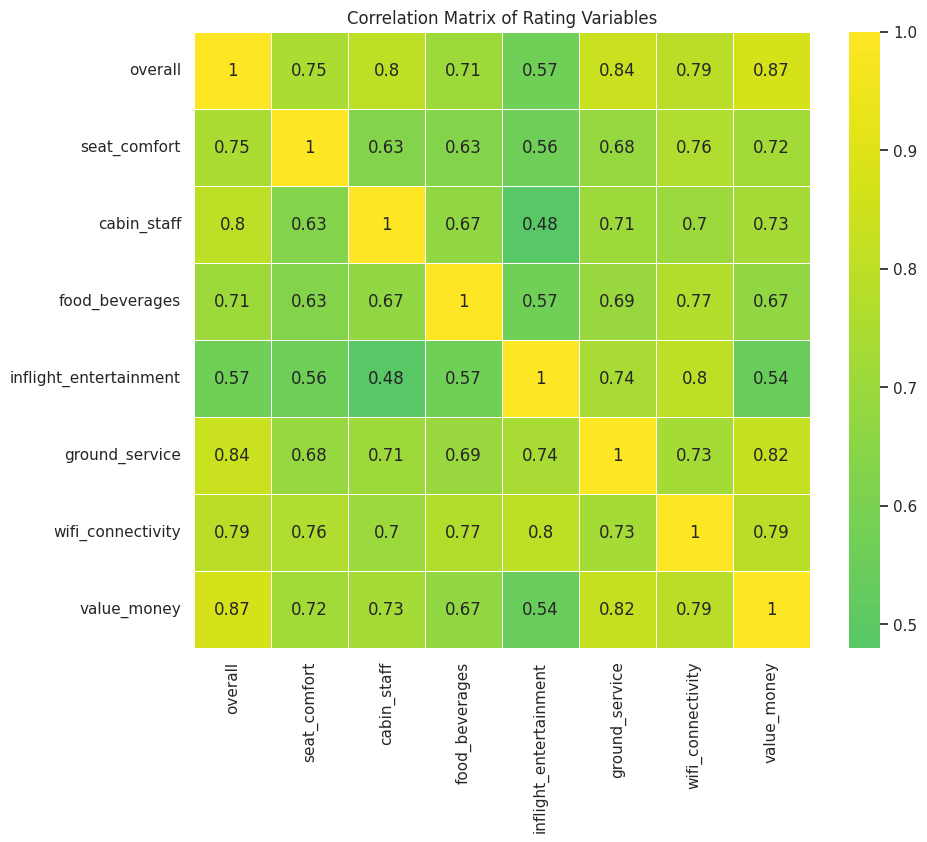

In [ ]:
# Compute correlation matrix
corr_matrix = df_filtered_na[rating_cols].corr().round(2)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", center=0, linewidths=0.5, square=True)
plt.title("Correlation Matrix of Rating Variables")
plt.show()

### Finding origin and destination information

#### Converting known routes to origin and destination information

In [ ]:
# Check how many route features are blank
df_filtered_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3261 entries, 1528 to 39120
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline_name            3261 non-null   object
 1   link                    3261 non-null   object
 2   title                   3261 non-null   object
 3   author                  3261 non-null   object
 4   author_country          3255 non-null   object
 5   date                    3261 non-null   object
 6   content                 3261 non-null   object
 7   aircraft                143 non-null    object
 8   type_traveller          335 non-null    object
 9   cabin_flown             3058 non-null   object
 10  route                   329 non-null    object
 11  overall                 3052 non-null   Int64 
 12  seat_comfort            3098 non-null   Int64 
 13  cabin_staff             3099 non-null   Int64 
 14  food_beverages          3047 non-null   Int64 
 15  infli

In [ ]:
# Ensure you're working with a clean copy
df_filtered_na = df_filtered_na.copy()

# Define the parser function
def parse_route_string(route_text):
    if not isinstance(route_text, str):
        return None, None, None

    route_text = route_text.strip()
    origin = destination = layover = None

    if " via " in route_text:
        main_part, layover = route_text.split(" via ", 1)
        layover = layover.strip()
    else:
        main_part = route_text

    if " to " in main_part:
        origin, destination = main_part.split(" to ", 1)
        origin = origin.strip()
        destination = destination.strip()

    return origin, destination, layover


In [ ]:
# Apply the parsing function to the route column
df_filtered_na[['origin', 'destination', 'layover']] = df_filtered_na['route'].apply(
    lambda x: pd.Series(parse_route_string(x))
)

In [ ]:
# Filter to rows where route exists but origin does not and print all route values
df_filtered_na[(df_filtered_na['route'].notna()) & (df_filtered_na['origin'].isna())]['route'].unique()

array(['YYZto EWR', 'YWG-LHR via YYZ',
       'Sault Ste. Marie, Canada - Toronto - Frankfurt - Helsinki',
       'Vancouver-Toronto-Baltimore', 'YUL-LHR-YYZ-MEX',
       'JFK-BOS-MIA-CUR', 'SANto LHR via JFK', 'DCA-NRT via MSP',
       ' Metro Airport from Boston Logan', 'DEN-GRR', 'TPA-IAD-LHR',
       'Newark - Tel Aviv'], dtype=object)

In [ ]:
# Define manual edits
manual_overrides = {
    'YYZto EWR': ('Toronto', 'Newark', None),
    'YWG-LHR via YYZ': ('Winnipeg', 'London Heathrow', 'Toronto'),
    'Sault Ste. Marie, Canada - Toronto - Frankfurt - Helsinki': ('Sault Ste. Marie', 'Helsinki', 'Toronto, Frankfurt'),
    'Vancouver-Toronto-Baltimore': ('Vancouver', 'Baltimore', 'Toronto'),
    'YUL-LHR-YYZ-MEX': ('Montreal', 'Mexico City', 'London, Toronto'),
    'JFK-BOS-MIA-CUR': ('New York', 'Curaçao', 'Boston, Miami'),
    'SANto LHR via JFK': ('San Diego', 'London Heathrow', 'New York'),
    'DCA-NRT via MSP': ('Washington D.C.', 'Tokyo Narita', 'Minneapolis'),
    ' Metro Airport from Boston Logan': ('Boston Logan', 'Detroit Metro', None),
    'DEN-GRR': ('Denver', 'Grand Rapids', None),
    'TPA-IAD-LHR': ('Tampa', 'London Heathrow', 'Washington Dulles'),
    'Newark - Tel Aviv': ('Newark', 'Tel Aviv', None),
}


In [ ]:
# Function to apply manual edits
def apply_manual_override(row):
    route = row['route']
    if route in manual_overrides:
        origin, destination, layover = manual_overrides[route]
        return pd.Series([origin, destination, layover])
    else:
        return pd.Series([row.get('origin'), row.get('destination'), row.get('layover')])

In [ ]:
# Apply function to the dataset
df_filtered_na = df_filtered_na.copy()

df_filtered_na[['origin', 'destination', 'layover']] = df_filtered_na.apply(
    apply_manual_override, axis=1
)

In [ ]:
# Save df_filtered_na as csv
df_filtered_na.to_csv('df_filtered_na.csv', index=False)

In [ ]:
# Count na origin
df_filtered_na['origin'].isna().sum()

np.int64(2932)

In [ ]:
# Count na destination
df_filtered_na['destination'].isna().sum()

np.int64(2932)

**TAKEAWAY** Not a lot of origin and destination information can be extracted for the dataset with natural language processing.